<a href="https://colab.research.google.com/github/camposraiza/datascience/blob/master/_getthedata_%7C_Airbnb_em_Londres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb em Londres

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook* iremos analisar os dados referentes à cidade de Londres e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).
Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* listings.csv - Summary information and metrics for listings in London (good for visualisations).

In [11]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

%matplotlib inline

In [12]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv ("http://data.insideairbnb.com/united-kingdom/england/london/2020-06-11/visualisations/listings.csv  ")

## Análise dos Dados

**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da  propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [13]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11551,Arty and Bright London Apartment in Zone 2,43039,Adriano,NaN,Lambeth,51.46225,-0.11732,Entire home/apt,88,2,192,2020-03-26,1.54,2,347
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,65,1,21,2020-02-22,0.18,3,347
2,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100,10,89,2020-03-16,0.70,1,288
3,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,300,3,42,2019-11-02,0.37,15,326
4,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,NaN,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaN,NaN,2,346


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [14]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	 83711
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

É possível ver que a coluna neighbourhood_group possui 100% dos seus valores faltantes. As variáveis reviews_per_month e last_review possuem 25% de valores nulos em suas linhas. A variável host_name têm aproximadamente 0,001% dos valores nulos.

In [15]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.257648
last_review                       0.257648
name                              0.000299
host_name                         0.000131
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

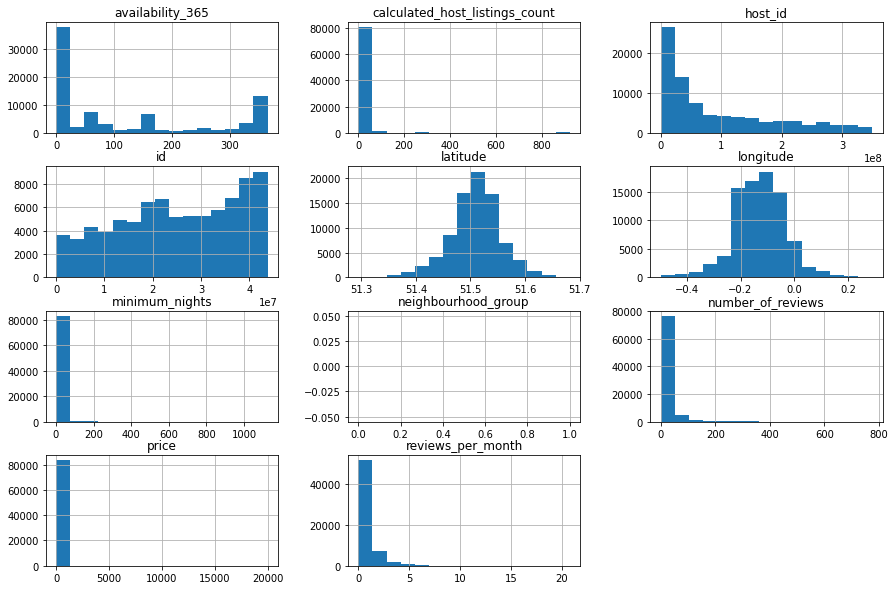

In [16]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há outliers presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis price, minimum_nights e calculated_host_listings_count.
Os valores não seguem uma distribuição e distorcem a representação gráffica. Para confirmar, há duas maneitas rápidas que auxiliam a detecção de outlilers. São elas:
* Resumo estatístico por meio do método describe()
* Plotar boxplote para a variável.

In [20]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights','number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,83711.000000,83711.000000,83711.000000,62143.000000,83711.000000,83711.000000
mean,127.530922,4.632247,16.904326,0.794693,19.586613,117.365914
std,282.339529,19.800238,36.606567,1.008822,99.469992,136.114371
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,46.000000,1.000000,0.000000,0.170000,1.000000,0.000000
50%,81.000000,2.000000,4.000000,0.440000,1.000000,69.000000
75%,139.000000,3.000000,17.000000,1.040000,4.000000,249.000000
max,19970.000000,1125.000000,775.000000,20.760000,921.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:
* A variável price possui 75% do valor abaixo de 139, porém seu valor máximo é 19970.
* A quantidade mínima de noites (minimum_nights) está acima de 365 dias no ano

#### **Boxplot para minimum_nights**

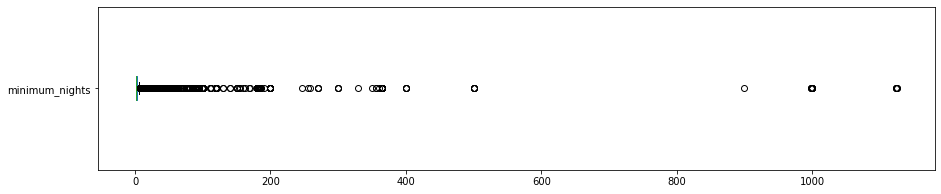

minimum_nights: valores acima de 30:
1025 entradas
1.2245%


In [25]:
#minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

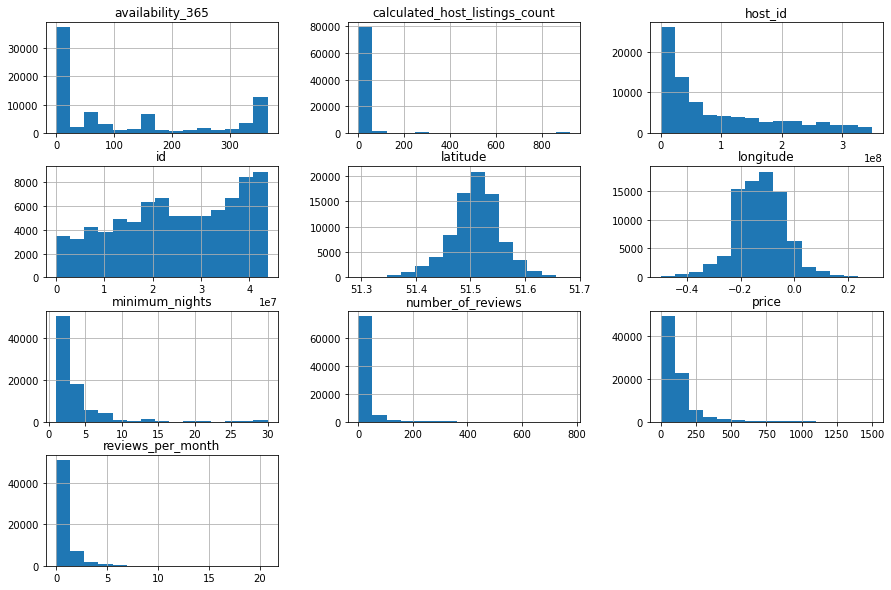

In [26]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [27]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    45927
Private room       35218
Hotel room           728
Shared room          655
Name: room_type, dtype: int64

In [28]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.556502
Private room       0.426740
Hotel room         0.008821
Shared room        0.007937
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**

In [29]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Westminster               195.919901
Kensington and Chelsea    195.301694
City of London            170.565789
Camden                    149.486203
Hammersmith and Fulham    131.176263
Richmond upon Thames      124.901182
Wandsworth                118.461949
Southwark                 113.658170
Islington                 112.603860
Merton                    106.976318
Name: price, dtype: float64

In [35]:
#ver quantidade de imóveis
print(df_clean[df_clean.neighbourhood == "Westminster"].shape)

#ver as entradas
df_clean[df_clean.neighbourhood == "Westminster"]

(9301, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,Westminster,51.52195,-0.14094,Entire home/apt,300,3,42,2019-11-02,0.37,15,326
17,39387,Stylish bedsit in Notting Hill ish flat.,168920,Alec,Westminster,51.52589,-0.19942,Private room,39,5,10,2019-11-03,0.14,1,69
33,45168,Best Part of Town -Home from Home!,199549,Lina,Westminster,51.51737,-0.19576,Entire home/apt,125,3,102,2020-01-03,0.86,1,0
39,51830,Fantastic Period Flat Notting Hill,239020,Sarah,Westminster,51.51757,-0.19195,Entire home/apt,120,2,121,2020-01-01,1.05,1,55
45,55706,Amazing 2 bed 2 bath flat in central London,211108,Simon,Westminster,51.49588,-0.15440,Entire home/apt,250,5,92,2020-02-02,0.79,3,302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83682,43734785,!-!TOP-Luxury Spacious apartment3BR-*,349445208,Mandy,Westminster,51.51961,-0.14844,Entire home/apt,592,2,0,NaN,NaN,1,346
83685,43735314,4 Bed Townhouse 2mins Walk to Hyde Park,279350330,A H K,Westminster,51.51193,-0.18526,Entire home/apt,250,3,0,NaN,NaN,18,69
83688,43737034,Quintessential London Mews House on Hyde Park,313081439,Patrick,Westminster,51.51261,-0.17417,Entire home/apt,171,1,0,NaN,NaN,1,36
83691,43737744,"Smart Bayswater studio w/ W/D, nr. Lancaster",314162972,Blueground,Westminster,51.51278,-0.18028,Entire home/apt,83,30,0,NaN,NaN,12,284


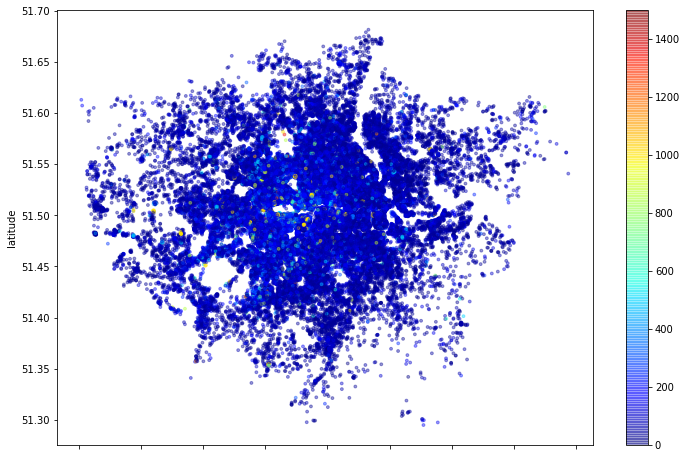

In [30]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.

*Análise realizada em 12-08-2020

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### Análise realizada como parte das atividades do curso **Data Science na Prática 2.0** *by [sigmoidal.ai](https://sigmoidal.ai)*


